In [1]:
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

import warnings
%matplotlib inline

In [3]:
data_dir = "../"
data = pd.read_csv(data_dir + "TRYJPY.csv") 
data.head()

,dare,open,high,low,close
0,2007/4/2,84.62,85.02,84.32,84.86
1,2007/4/3,84.84,86.76,84.70,86.60
2,2007/4/4,86.58,87.02,86.29,86.68
3,2007/4/5,86.67,87.00,86.35,86.90
4,2007/4/6,86.91,87.46,86.83,87.11


In [12]:
data2 = np.array(data)

In [13]:
data2 = np.c_[data2, np.zeros((len(data2),1))] 
ave_day = 5
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float) 
    data2[i,5] = np.mean(tmp)

In [14]:
# 20日移動平均線
data2 = np.c_[data2, np.zeros((len(data2),1))]
ave_day = 20
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,6] = np.mean(tmp)

# 75日移動平均線
data2 = np.c_[data2, np.zeros((len(data2),1))] 
ave_day = 75
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,7] = np.mean(tmp)
    
# 200日移動平均線
data2 = np.c_[data2, np.zeros((len(data2),1))] 
ave_day = 200
for i in range(ave_day, len(data2)):
    tmp =data2[i-ave_day+1:i+1,4].astype(np.float)
    data2[i,8] = np.mean(tmp)

In [15]:
# 一目均衡表を
para1 =9
para2 = 26
para3 = 52

# 転換線 
data2 = np.c_[data2, np.zeros((len(data2),1))] 
for i in range(para1, len(data2)):
    tmp_high =data2[i-para1+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para1+1:i+1,3].astype(np.float)
    data2[i,9] = (np.max(tmp_high) + np.min(tmp_low)) / 2 
    
# 基準線 
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para2, len(data2)):
    tmp_high =data2[i-para2+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para2+1:i+1,3].astype(np.float)
    data2[i,10] = (np.max(tmp_high) + np.min(tmp_low)) / 2 

# 先行スパン1
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(0, len(data2)-para2):
    tmp =(data2[i,9] + data2[i,10]) / 2 
    data2[i+para2,11] = tmp


# 先行スパン2 
data2 = np.c_[data2, np.zeros((len(data2),1))]
for i in range(para3, len(data2)-para2):
    tmp_high =data2[i-para3+1:i+1,2].astype(np.float)
    tmp_low =data2[i-para3+1:i+1,3].astype(np.float)
    data2[i+para2,12] = (np.max(tmp_high) + np.min(tmp_low)) / 2 

In [17]:
# ボリンジャーバンド
parab = 20
data2 = np.c_[data2, np.zeros((len(data2),6))] 
for i in range(parab, len(data2)):
    tmp = data2[i-parab+1:i+1,4].astype(np.float)
    data2[i,13] = np.mean(tmp) + 1.0* np.std(tmp) 
    data2[i,14] = np.mean(tmp) - 1.0* np.std(tmp) 
    data2[i,15] = np.mean(tmp) + 2.0* np.std(tmp) 
    data2[i,16] = np.mean(tmp) - 2.0* np.std(tmp) 
    data2[i,17] = np.mean(tmp) + 3.0* np.std(tmp) 
    data2[i,18] = np.mean(tmp) - 3.0* np.std(tmp) 


In [18]:
# データの内容を見ます
data_show=pd.DataFrame(data2)
data_show

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2007/4/2,84.62,85.02,84.32,84.86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007/4/3,84.84,86.76,84.7,86.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2007/4/4,86.58,87.02,86.29,86.68,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2007/4/5,86.67,87,86.35,86.9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2007/4/6,86.91,87.46,86.83,87.11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2007/4/9,87.08,87.51,86.81,87.26,86.91,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2007/4/10,87.27,87.53,86.46,86.94,86.978,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2007/4/11,87.09,87.38,86.66,86.79,87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2007/4/12,86.79,87.03,86.19,86.68,86.956,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2007/4/13,86.65,87.16,85.99,87.16,86.966,0,0,0,86.115,...,0,0,0,0,0,0,0,0,0,0


In [21]:
day_ago = 20 
num_sihyou = 1 + 4 + 4 +6 # 終値1本、MVave4本、itimoku4本、ボリンジャー6本

X = np.zeros((len(data2), day_ago*num_sihyou)) 

for s in range(0, num_sihyou): 
    for i in range(0, day_ago):
        X[i:len(data2),day_ago*s+i] = data2[0:len(data2)-i,s+4]

In [22]:
Y = np.zeros(len(data2))

# 何日後の値段の差を予測するか
pre_day = 1
Y[0:len(Y)-pre_day] = X[pre_day:len(X),0] - X[0:len(X)-pre_day,0]

In [23]:
#正規化
original_X = np.copy(X) 
tmp_mean = np.zeros(len(X))

for i in range(day_ago,len(X)):
    tmp_mean[i] = np.mean(original_X[i-day_ago+1:i+1,0]) 
    for j in range(0, X.shape[1]): 
        X[i,j] = (X[i,j] - tmp_mean[i])
    Y[i] =  Y[i] 

In [46]:
# XとYを学習データとテストデータ(2018)に分ける　
X_train = X[200:2804,:]
Y_train = Y[200:2804] 

X_test = X[2804:len(X)-pre_day,:] 
Y_test = Y[2804:len(Y)-pre_day]

In [47]:
# 2018年のデータ確認
data_show=pd.DataFrame(Y_test)
data_show
data_show.to_csv("tmp.csv")

In [48]:
# 学習データを使用して、線形回帰モデルを作成します
from sklearn import linear_model # scikit-learnライブラリの関数を使用します
linear_reg_model = linear_model.LinearRegression()

linear_reg_model.fit(X_train, Y_train) # モデルに対して、学習データをフィットさせ係数を学習させます

print("回帰式モデル係数")
print(linear_reg_model.intercept_) 
print(linear_reg_model.coef_) 

回帰式モデル係数
0.012041315644201231
[ 1.05205288e+11 -1.19219218e+10 -1.06309330e+11 -2.35058587e+11
 -2.29927156e+11 -1.38398810e+11 -1.37523529e+11 -1.54153979e+11
 -1.62960801e+11 -1.74386113e+11 -1.76586918e+11 -1.76504873e+11
 -1.64113512e+11 -1.72002836e+11 -1.86747306e+11 -2.15015457e+11
 -9.88455736e+10 -2.19075908e+08  1.45226327e+11  1.66264679e+11
  2.80731047e+11 -1.66866899e+11 -2.26600666e+11 -2.26004405e+11
 -2.45808381e+11 -2.09696150e+11 -1.80946391e+11 -1.58903523e+11
 -1.75337349e+11 -2.01299924e+11 -2.00277322e+11 -1.97285772e+11
 -2.22322101e+11 -1.49474346e+11 -1.16473481e+11 -5.91216128e+10
 -7.75456541e+11 -7.18656945e+11 -8.67851455e+11 -2.24946789e+11
 -1.72778534e+11 -1.14767960e+11 -1.00596200e+11  9.49617932e+09
 -2.39778046e+10 -8.85121516e+09 -6.62525309e+10 -2.33206589e+10
 -2.36685314e+10  3.91126991e+10 -9.25233562e+08  1.33932466e+10
 -1.60117814e+10  4.42495402e+10 -1.64077557e+10  6.51580429e+00
 -8.11512375e+00  7.00762177e+00 -5.69469452e+00  2.07492828

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


予測日数：281、正解日数：147、正解率：52.313167259786475


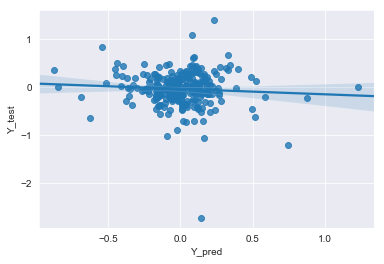

In [49]:
#グラフ
Y_pred = linear_reg_model.predict(X_test)

result = pd.DataFrame(Y_pred) 
result.columns = ['Y_pred']
result['Y_test'] = Y_test

sns.set_style('darkgrid') 
sns.regplot(x='Y_pred', y='Y_test', data=result) 

# 正答率
success_num = 0
for i in range(len(Y_pred)):
    if Y_pred[i] * Y_test[i] >=0:
        success_num+=1

print("予測日数："+ str(len(Y_pred))+"、正解日数："+str(success_num)+"、正解率："+str(success_num/len(Y_pred)*100))

2018の利益合計：-1.280


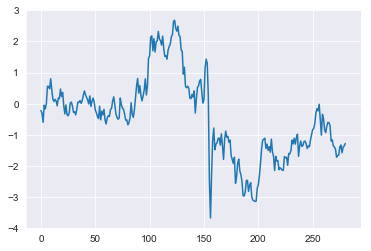

In [50]:
dif = data2[2805:,4] - data2[2804:-1,4] # 翌日の終値-当日の終値

# 2018年の予測結果合計
# 前々日終値＜前日終値＝long
sum_2018 = 0

for i in range(0,len(dif)): 
    if Y_pred[i] >= 0:
        sum_2018 += dif[i]
    else:
        sum_2018 -= dif[i]

print("2018の利益合計：%1.3lf" %sum_2018) 

total_return = np.zeros(len(dif))

if Y_pred[0] >=0: 
    total_return[0] = dif[0]
else:
    total_return[0] = -dif[0]

for i in range(1, len(result)): 
    if Y_pred[i] >=0:
        total_return[i] = total_return[i-1] + dif[i]
    else:
        total_return[i] = total_return[i-1] - dif[i]

plt.plot(total_return)